In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/cleaned/amazon_india_2015_2025_cleaned.csv")
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating'],
      dtype='object')

#### Question 1
- Create a comprehensive revenue trend analysis showing yearly revenue growth from 2015-2025. Include percentage growth rates, trend lines, and highlight key growth periods with annotations.


In [3]:
df["order_date"].dtype

dtype('O')

In [4]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [5]:
# Group by year and sum revenue
yearly_revenue = df.groupby('order_year')['final_amount_inr'].sum().reset_index()
# sort by year
yearly_revenue = yearly_revenue.sort_values('order_year')
yearly_revenue['growth_%'] = yearly_revenue['final_amount_inr'].pct_change() * 100

In [6]:
yearly_revenue

,order_year,final_amount_inr,growth_%
0,2015,1.955959e+09,NaN
1,2016,3.287019e+09,68.051571
2,2017,4.968091e+09,51.142737
3,2018,6.441373e+09,29.654901
4,2019,7.709617e+09,19.689032
5,2020,1.030614e+10,33.679013
6,2021,9.515901e+09,-7.667649
7,2022,7.677261e+09,-19.321764
8,2023,6.981461e+09,-9.063137
9,2024,6.217602e+09,-10.941236


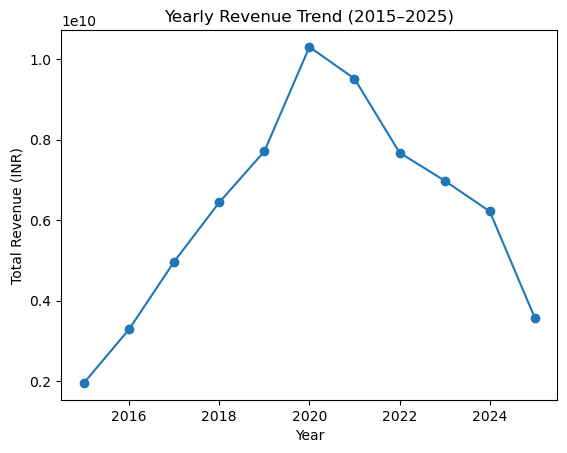

In [7]:
# plot for revenue trend

plt.plot(yearly_revenue["order_year"], yearly_revenue["final_amount_inr"], marker="o")
plt.title("Yearly Revenue Trend (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Total Revenue (INR)")
plt.show()


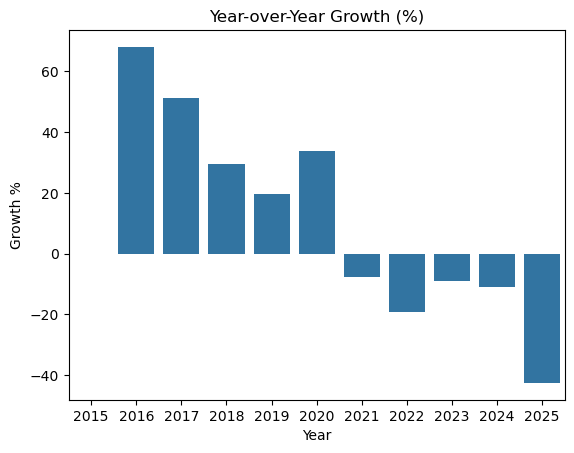

In [8]:
# plot for highest growth year
sns.barplot(data=yearly_revenue, x="order_year", y="growth_%")

plt.title("Year-over-Year Growth (%)")
plt.ylabel("Growth %")
plt.xlabel("Year")
plt.show()

- Revenue shows steady growth across the decade.
- Highest growth observed in 2016 year.
- Slight dip observed from 2021 year (possible covid disruption).

#### Question 2
- Analyze seasonal patterns in sales data. Create monthly sales heatmaps and identify peak selling months. Compare seasonal trends across different years and categories.


In [9]:
monthly_revenue = df.groupby(["order_year", "order_month"])["final_amount_inr"].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values("order_month")
monthly_revenue.head()

,order_year,order_month,final_amount_inr
0,2015,1,1.491342e+08
12,2016,1,2.455656e+08
24,2017,1,3.715020e+08
36,2018,1,4.832506e+08
48,2019,1,5.867325e+08


In [10]:
heatmap_data = monthly_revenue.pivot(index="order_year", columns="order_month",values="final_amount_inr")
heatmap_data

order_month,1,2,3,4,5,6,7,8,9,10,11,12
order_year,,,,,,,,,,,,
2015,1.491342e+08,1.327614e+08,1.330174e+08,1.596198e+08,1.435651e+08,1.280545e+08,1.445172e+08,1.550235e+08,1.573196e+08,1.966409e+08,2.091434e+08,2.471616e+08
2016,2.455656e+08,2.221434e+08,2.242887e+08,2.629423e+08,2.520828e+08,2.203185e+08,2.418398e+08,2.697246e+08,2.691417e+08,3.268127e+08,3.427277e+08,4.094313e+08
2017,3.715020e+08,3.369896e+08,3.353485e+08,4.095967e+08,3.838427e+08,3.317227e+08,3.623743e+08,4.049654e+08,4.001450e+08,4.919785e+08,5.235648e+08,6.160604e+08
2018,4.832506e+08,4.321953e+08,4.305960e+08,5.349933e+08,4.926955e+08,4.262423e+08,4.878005e+08,5.205127e+08,5.150250e+08,6.514402e+08,6.807191e+08,7.859024e+08
2019,5.867325e+08,5.063884e+08,5.375916e+08,6.307223e+08,5.836587e+08,5.196672e+08,5.704960e+08,6.261907e+08,6.165789e+08,7.644083e+08,8.188690e+08,9.483132e+08
2020,8.762402e+08,7.902426e+08,6.976785e+08,8.404176e+08,7.776487e+08,6.844875e+08,7.751205e+08,8.342969e+08,8.209964e+08,8.657623e+08,9.881462e+08,1.355102e+09
2021,8.145995e+08,7.224042e+08,6.533995e+08,7.701299e+08,7.261451e+08,6.332427e+08,7.072496e+08,7.646908e+08,7.625361e+08,8.042682e+08,9.080993e+08,1.249136e+09
2022,6.515836e+08,5.856573e+08,5.194861e+08,6.197466e+08,5.824650e+08,5.054089e+08,5.672746e+08,6.263235e+08,6.232946e+08,6.479427e+08,7.406045e+08,1.007474e+09
2023,5.859112e+08,5.275151e+08,4.670651e+08,5.688940e+08,5.235640e+08,4.620861e+08,5.163892e+08,5.695199e+08,5.650350e+08,5.815095e+08,6.782323e+08,9.357392e+08


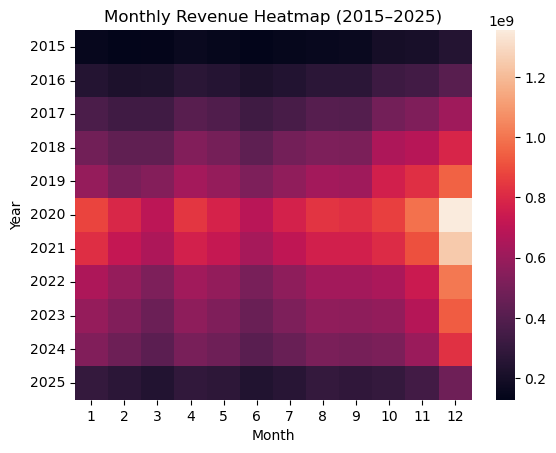

In [11]:
#Plot for heatmap 

sns.heatmap(heatmap_data)

plt.title("Monthly Revenue Heatmap (2015–2025)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

In [12]:
year_month = df.groupby(["order_year", "order_month"])["final_amount_inr"].sum().reset_index()
year_month

,order_year,order_month,final_amount_inr
0,2015,1,1.491342e+08
1,2015,2,1.327614e+08
2,2015,3,1.330174e+08
3,2015,4,1.596198e+08
4,2015,5,1.435651e+08
...,...,...,...
127,2025,8,2.980266e+08
128,2025,9,2.855707e+08
129,2025,10,2.968319e+08
130,2025,11,3.392830e+08


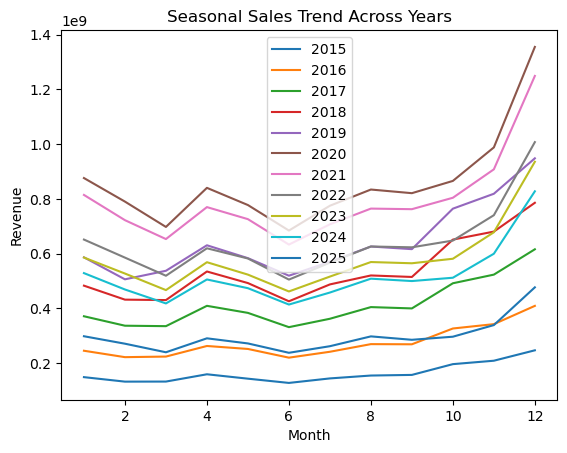

In [13]:
# Plot for seaonal trend across year
for year in year_month["order_year"].unique():
    data = year_month[year_month["order_year"] == year]
    plt.plot(data["order_month"], data["final_amount_inr"], label=year)

plt.title("Seasonal Sales Trend Across Years")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.show()

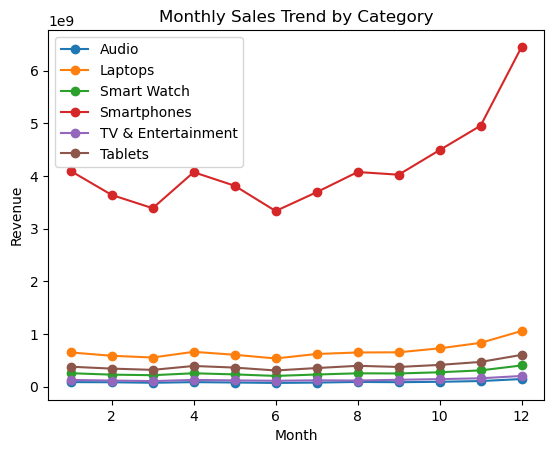

In [ ]:
category_month = df.groupby(["subcategory", "order_month"])["final_amount_inr"].sum().reset_index()

#Plot for seasonal trend across category
for cat in category_month['subcategory'].unique():  
    data = category_month[category_month['subcategory'] == cat]
    plt.plot(data['order_month'],
             data['final_amount_inr'],
             marker='o',
             label=cat)
    
plt.title("Monthly Sales Trend by Category")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.show()

- October and November show consistent revenue spikes (likely Diwali season).
- Q4 contributes the highest revenue annually.
- Q1 shows comparatively lower performance.

#### Question 4
- Visualize the evolution of payment methods from 2015-2025. Show the rise of UPI, decline of COD, and create stacked area charts to demonstrate market share changes over time.


In [15]:
payment_trend = df.groupby(["order_year", "payment_method"]).size().reset_index(name="count")
payment_trend.head()


,order_year,payment_method,count
0,2015,COD,24149
1,2015,Credit Card,3877
2,2015,Debit Card,2520
3,2015,Net Banking,1548
4,2016,COD,37501


In [16]:
payment_pivot = payment_trend.pivot(index="order_year",columns="payment_method",values="count")
payment_pivot.head()

payment_method,BNPL,COD,Credit Card,Debit Card,Net Banking,UPI,Wallet
order_year,,,,,,,
2015,NaN,24149.0,3877.0,2520.0,1548.0,NaN,NaN
2016,NaN,37501.0,7538.0,5275.0,2087.0,1107.0,NaN
2017,NaN,44921.0,12017.0,8953.0,3735.0,5294.0,NaN
2018,NaN,48053.0,16329.0,13595.0,5805.0,12480.0,NaN
2019,NaN,47100.0,19953.0,18515.0,8164.0,23958.0,NaN


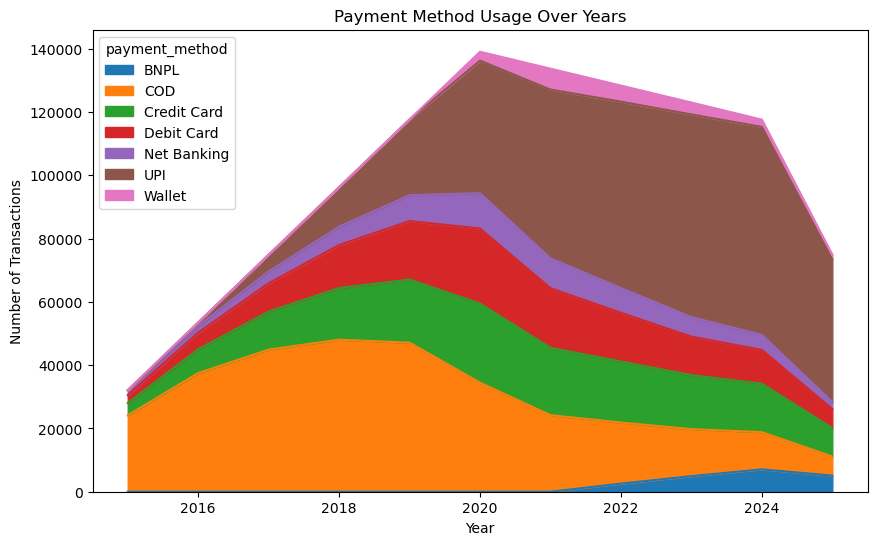

In [17]:
# Plot for stacked area chart
payment_pivot.plot(kind="area", stacked=True, figsize=(10,6))

plt.title("Payment Method Usage Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.show()

- UPI usage increased significantly after 2018.
- COD usage decreased over time.
- Digital payment methods are replacing cash payments.

#### Question 5
- Perform category-wise performance analysis. Create treemaps, bar charts, and pie charts showing revenue contribution, growth rates, and market share for each product category.


In [19]:
category_revenue = df.groupby("subcategory")["final_amount_inr"].sum().reset_index()
category_revenue = category_revenue.sort_values("final_amount_inr", ascending=False)
category_revenue

,subcategory,final_amount_inr
3,Smartphones,5.002023e+10
1,Laptops,8.129293e+09
5,Tablets,4.711709e+09
2,Smart Watch,3.111951e+09
4,TV & Entertainment,1.581016e+09
0,Audio,1.076258e+09


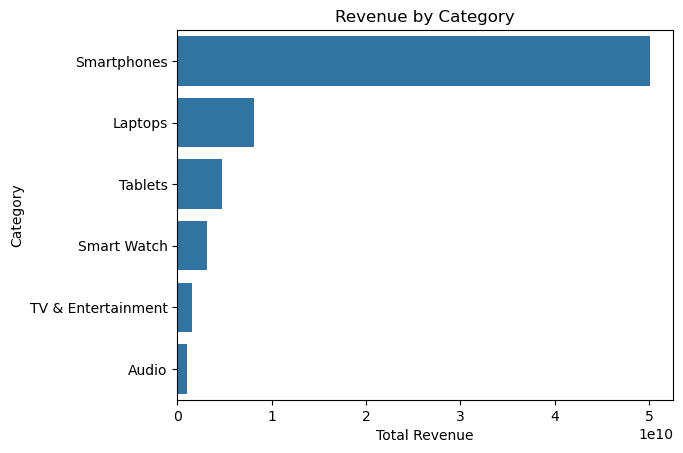

In [20]:
# plot for bar chart
sns.barplot(data=category_revenue, x="final_amount_inr", y="subcategory")

plt.title("Revenue by Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.show()

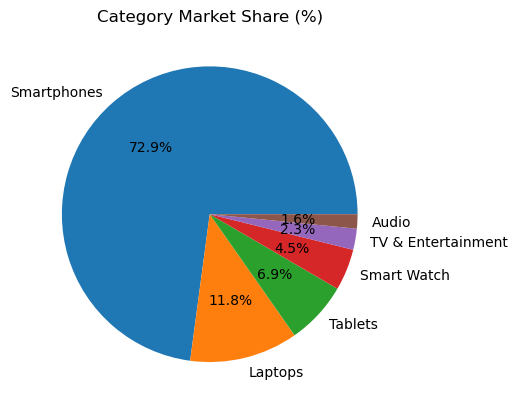

In [21]:
# Plot for pie chart

plt.pie(
    category_revenue["final_amount_inr"],
    labels=category_revenue["subcategory"],
    autopct="%1.1f%%"
)

plt.title("Category Market Share (%)")
plt.show()


In [5]:
category_year = df.groupby(["order_year", "category"])["final_amount_inr"].sum().reset_index()
category_year["growth_%"] = category_year.groupby("category")["final_amount_inr"].pct_change() * 100
category_year

,order_year,category,final_amount_inr,growth_%
0,2015,electronics,1.955959e+09,NaN
1,2016,electronics,3.287019e+09,68.051571
2,2017,electronics,4.968091e+09,51.142737
3,2018,electronics,6.441373e+09,29.654901
4,2019,electronics,7.709617e+09,19.689032
5,2020,electronics,1.030614e+10,33.679013
6,2021,electronics,9.515901e+09,-7.667649
7,2022,electronics,7.677261e+09,-19.321764
8,2023,electronics,6.981461e+09,-9.063137
9,2024,electronics,6.217602e+09,-10.941236


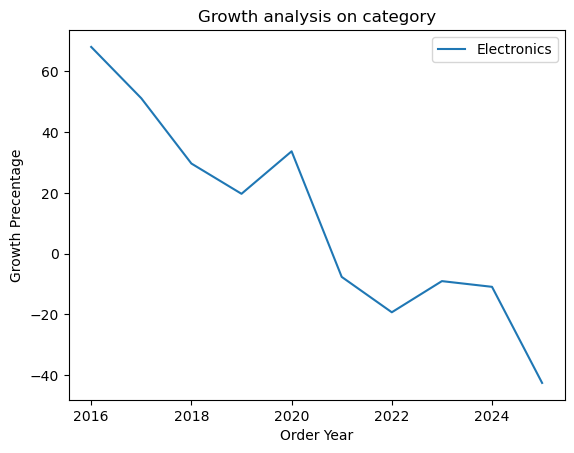

In [6]:
plt.plot(category_year["order_year"], category_year["growth_%"], label="Electronics")
plt.xlabel("Order Year")
plt.ylabel("Growth Precentage")
plt.title("Growth analysis on category")
plt.legend()
plt.show()

- Electronics contributes the highest revenue, holding the largest market share
- Smartphones holds the highest market share in electronics

#### Question 6
- Analyze Prime membership impact on customer behavior. Compare average order values, order frequency, and category preferences between Prime and non-Prime customers using multiple visualization types.


In [30]:
aov = df.groupby("is_prime_member")["final_amount_inr"].mean().reset_index()
aov


,is_prime_member,final_amount_inr
0,False,58128.639479
1,True,70649.054844


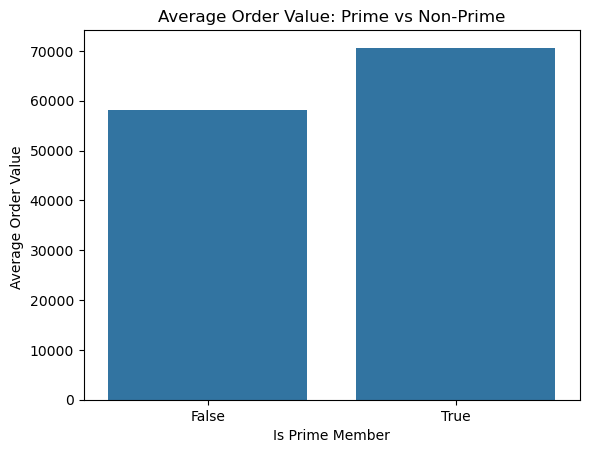

In [31]:
# avg bar chart for prime and non prime
sns.barplot(
    data=aov,
    x="is_prime_member",
    y="final_amount_inr"
)

plt.title("Average Order Value: Prime vs Non-Prime")
plt.xlabel("Is Prime Member")
plt.ylabel("Average Order Value ")
plt.show()

In [32]:
order_freq = df.groupby("is_prime_member")["transaction_id"].count().reset_index()
order_freq

,is_prime_member,transaction_id
0,False,675766
1,True,415421


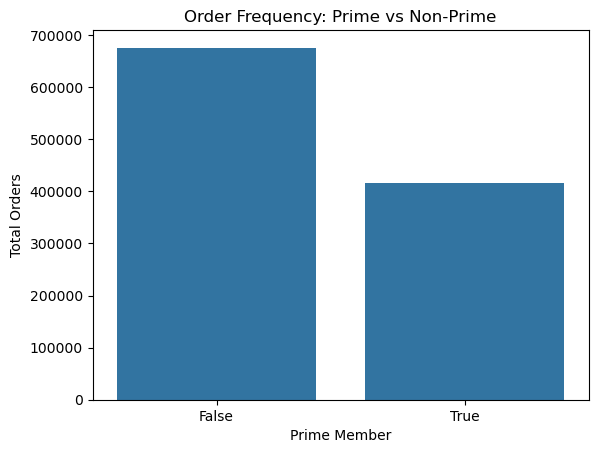

In [33]:
# Plot for frequency between prime and non prime member

sns.barplot(
    data=order_freq,
    x="is_prime_member",
    y="transaction_id"
)
plt.title("Order Frequency: Prime vs Non-Prime")
plt.xlabel("Prime Member")
plt.ylabel("Total Orders")
plt.show()

In [7]:
prime_category = df.groupby(["is_prime_member", "subcategory"])["final_amount_inr"].sum().reset_index()
prime_category

,is_prime_member,subcategory,final_amount_inr
0,False,Audio,7.229916e+08
1,False,Laptops,4.422144e+09
2,False,Smart Watch,1.935314e+09
3,False,Smartphones,2.861436e+10
4,False,TV & Entertainment,8.186062e+08
5,False,Tablets,2.767945e+09
6,True,Audio,3.532668e+08
7,True,Laptops,3.707149e+09
8,True,Smart Watch,1.176636e+09
9,True,Smartphones,2.140587e+10


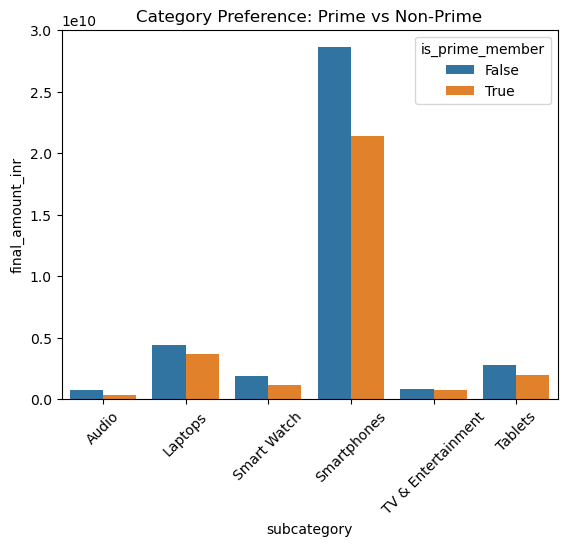

In [10]:
# plot for category preference by prime and non prime members
sns.barplot(data=prime_category,
            x='subcategory',
            y='final_amount_inr',
            hue='is_prime_member')

plt.title("Category Preference: Prime vs Non-Prime")
plt.xticks(rotation=45)
plt.show()

- Prime customers have higher average order value.
- Prime customers shop less frequently.
- Non prime members have purchased more eletronic items

#### Question 7
Create geographic analysis of sales performance across Indian cities and states. Build choropleth maps and bar charts showing revenue density and growth patterns by tier (Metro/Tier1/Tier2/Rural).


In [36]:
state_revenue = df.groupby("customer_state")["final_amount_inr"].sum().reset_index()
state_revenue = state_revenue.sort_values("final_amount_inr",ascending=False)
state_revenue.head()


,customer_state,final_amount_inr
7,Maharashtra,1.559607e+10
2,Delhi,8.183692e+09
11,Tamil Nadu,7.032007e+09
4,Karnataka,6.761159e+09
3,Gujarat,6.478648e+09


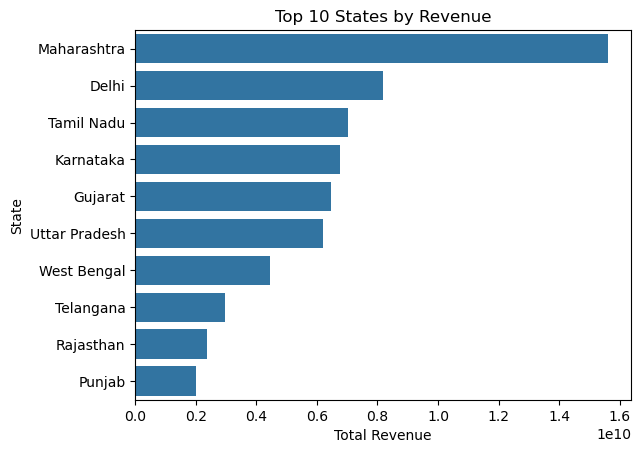

In [37]:
# Top sales by state wise plot
top_states = state_revenue.head(10)
sns.barplot(data=top_states, x="final_amount_inr", y="customer_state")

plt.title("Top 10 States by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("State")
plt.show()

In [38]:
city_revenue = df.groupby("customer_city")["final_amount_inr"].sum().reset_index()
city_revenue = city_revenue.sort_values("final_amount_inr", ascending=False)
city_revenue

,customer_city,final_amount_inr
21,mumbai,9.401795e+09
9,delhi,8.183692e+09
3,bangalore,6.761159e+09
7,chennai,5.650629e+09
16,kolkata,4.453768e+09
24,pune,3.997975e+09
0,ahmedabad,2.973781e+09
11,hyderabad,2.956681e+09
26,surat,2.393670e+09
13,jaipur,2.379290e+09


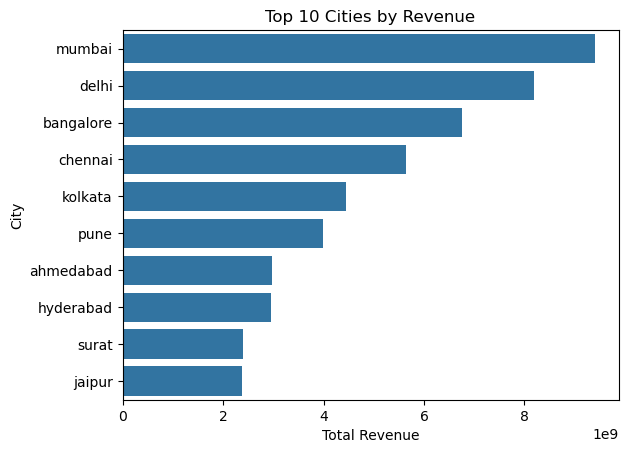

In [41]:
# Top sales by city wise plot
top_states = city_revenue.head(10)
sns.barplot(data=top_states, x="final_amount_inr", y="customer_city")

plt.title("Top 10 Cities by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("City")
plt.show()

In [39]:
tier_revenue = df.groupby('customer_tier')['final_amount_inr'].sum().reset_index()
tier_revenue

,customer_tier,final_amount_inr
0,Metro,3.740772e+10
1,Rural,2.170860e+09
2,Tier1,1.994628e+10
3,Tier2,9.105597e+09


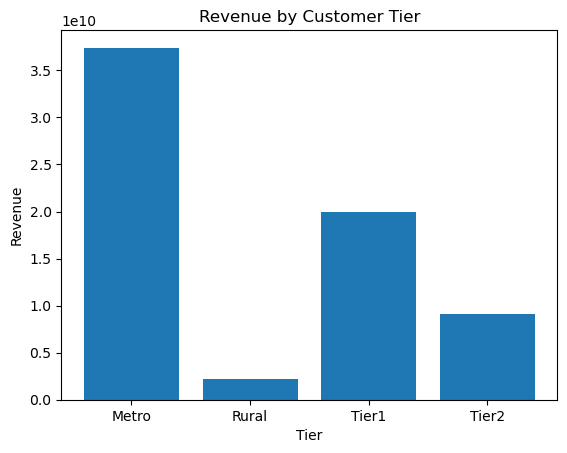

In [ ]:
# Plot for tier wise

plt.bar(tier_revenue['customer_tier'], tier_revenue['final_amount_inr'])
plt.title("Revenue by Customer Tier")
plt.xlabel("Tier")
plt.ylabel("Revenue")
plt.show()

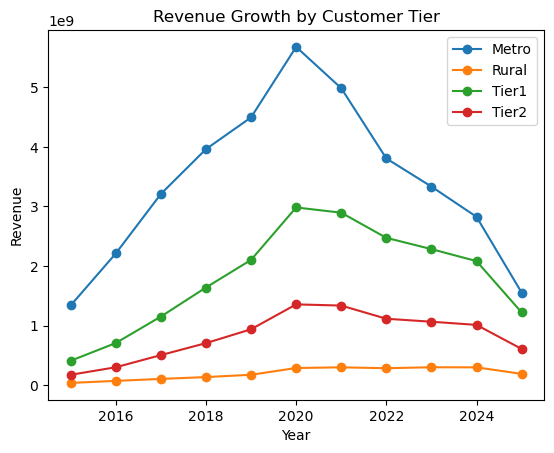

In [42]:
# Plot for for every year with tier sales

tier_year = df.groupby(['order_year','customer_tier'])['final_amount_inr'].sum().reset_index()
tier_year['growth_%'] = tier_year.groupby('customer_tier')['final_amount_inr'].pct_change() * 100

for tier in tier_year['customer_tier'].unique():  
    data = tier_year[tier_year['customer_tier'] == tier] 
    plt.plot(data['order_year'], data['final_amount_inr'], marker='o', label=tier)

plt.title("Revenue Growth by Customer Tier")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend()
plt.show()

- Metro cities generate highest revenue
- Tier1 and Tier2 cities show steady growth over years
- Rual areas are comaparitively low growth

#### Question 8
- Study festival sales impact using before/during/after analysis. Visualize revenue spikes during Diwali, Prime Day, and other festivals with detailed time series analysis.


In [11]:
festival_revenue = df.groupby('is_festival_sale')['final_amount_inr'].sum().reset_index()
festival_revenue

,is_festival_sale,final_amount_inr
0,False,5.311338e+10
1,True,1.551708e+10


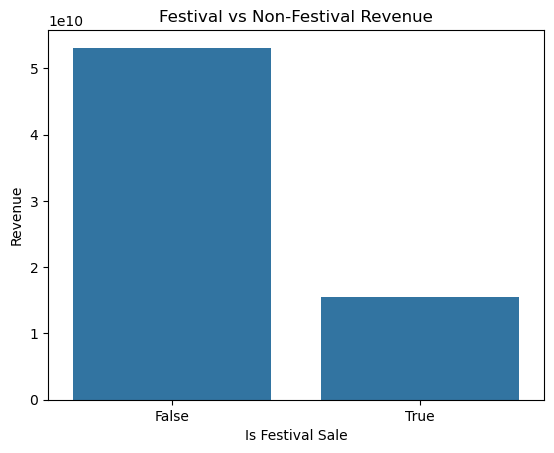

In [12]:
# plot for festival sale
sns.barplot(data=festival_revenue, x='is_festival_sale', y='final_amount_inr')

plt.title("Festival vs Non-Festival Revenue")
plt.xlabel("Is Festival Sale")
plt.ylabel("Revenue")
plt.show()


In [ ]:
festival_name_revenue = df.groupby("festival_name")["final_amount_inr"].sum().reset_index()
festival_name_revenue = festival_name_revenue.sort_values('final_amount_inr', ascending=False)
festival_name_revenue

,festival_name,final_amount_inr
4,No Festival,5.311338e+10
1,Back to School,3.799003e+09
2,Diwali Sale,3.692726e+09
0,Amazon Great Indian Festival,2.354313e+09
7,Summer Sale,1.983240e+09
3,Holi Festival,1.761748e+09
6,Republic Day Sale,8.973519e+08
8,Valentine Sale,6.219446e+08
5,Prime Day,4.067504e+08


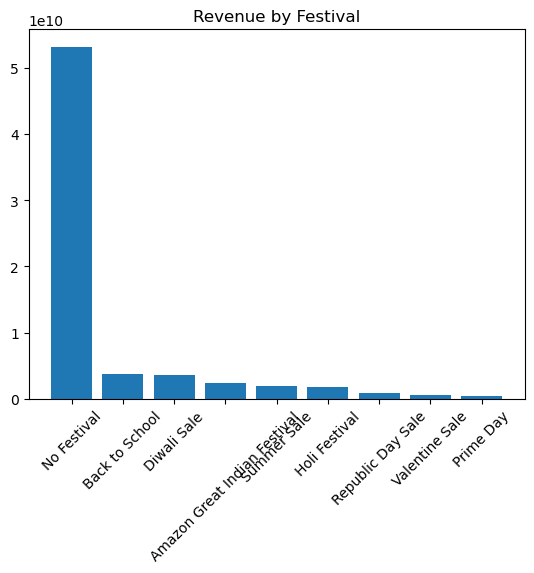

In [47]:
# Every festival sales in bar chart

plt.bar(festival_name_revenue['festival_name'],
        festival_name_revenue['final_amount_inr'])

plt.title("Revenue by Festival")
plt.xticks(rotation=45)
plt.show()

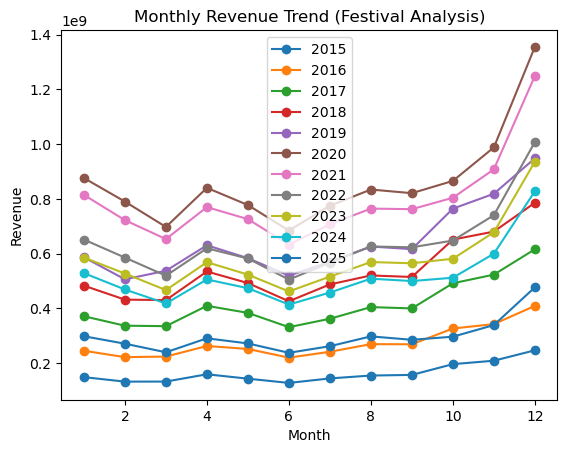

In [13]:
monthly_revenue = df.groupby(['order_year','order_month'])['final_amount_inr'].sum().reset_index()

# month wise revenue in each yeat plot
for year in monthly_revenue['order_year'].unique():
    data = monthly_revenue[monthly_revenue['order_year'] == year]
    plt.plot(data['order_month'], data['final_amount_inr'], marker='o', label=year)

plt.title("Monthly Revenue Trend (Festival Analysis)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.show()

In [49]:
diwali_analysis = monthly_revenue[monthly_revenue['order_month'].isin([9,10,11])]
diwali_analysis.value_counts()


order_year  order_month  final_amount_inr
2015        9            1.573196e+08        1
            10           1.966409e+08        1
            11           2.091434e+08        1
2016        9            2.691417e+08        1
            10           3.268127e+08        1
            11           3.427277e+08        1
2017        9            4.001450e+08        1
            10           4.919785e+08        1
            11           5.235648e+08        1
2018        9            5.150250e+08        1
            10           6.514402e+08        1
            11           6.807191e+08        1
2019        9            6.165789e+08        1
            10           7.644083e+08        1
            11           8.188690e+08        1
2020        9            8.209964e+08        1
            10           8.657623e+08        1
            11           9.881462e+08        1
2021        9            7.625361e+08        1
            10           8.042682e+08        1
            11    

- Festival seasons significantly impact revenue but overall due to non festival as more reveune
- Sales spike sharply during Diwali (October/November), showing highest monthly revenue

#### Question 9
- Analyze customer age group behavior and preferences. Create demographic analysis with category preferences, spending patterns, and shopping frequency across different age segments.


In [50]:
age_revenue = df.groupby('customer_age_group')['final_amount_inr'].sum().reset_index()
age_revenue = age_revenue.sort_values('final_amount_inr', ascending=False)
age_revenue

,customer_age_group,final_amount_inr
1,26-35,2.119949e+10
0,18-25,1.926369e+10
2,36-45,1.211724e+10
5,Unknown,8.233117e+09
3,46-55,6.004894e+09
4,55+,1.812030e+09


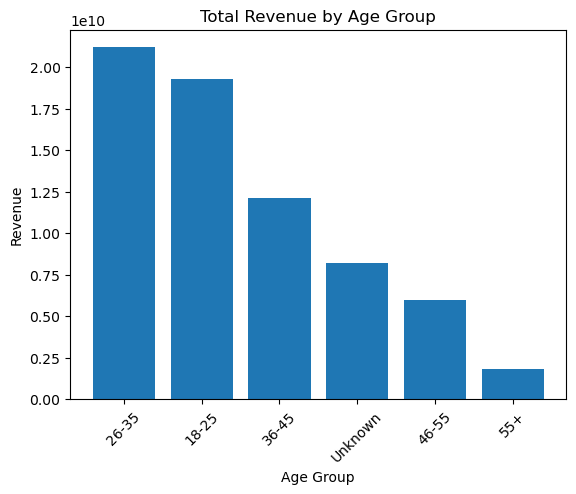

In [51]:
# bar chart for total revenue by age group
plt.bar(age_revenue['customer_age_group'], age_revenue['final_amount_inr'])

plt.title("Total Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

In [ ]:
age_avg_spend = df.groupby('customer_age_group')['final_amount_inr'].mean().reset_index()
age_avg_spend

,customer_age_group,final_amount_inr
0,18-25,62923.209554
1,26-35,62984.989428
2,36-45,62842.575046
3,46-55,62678.289416
4,55+,62663.126693
5,Unknown,62886.624769


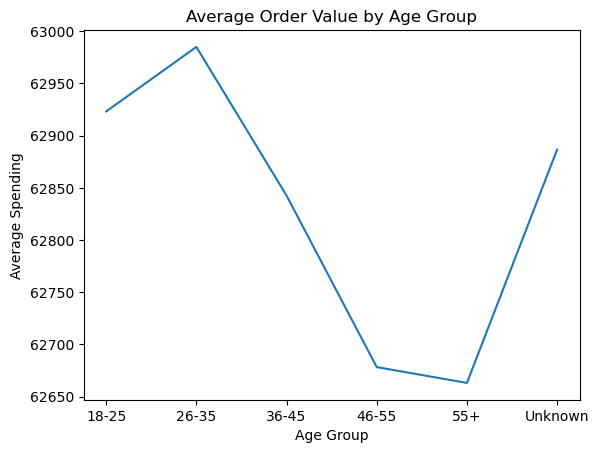

In [53]:
# Plot for average order value by age group
plt.plot(age_avg_spend['customer_age_group'], age_avg_spend['final_amount_inr'])

plt.title("Average Order Value by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spending")
plt.show()

In [54]:
age_frequency = df.groupby('customer_age_group')['transaction_id'].count().reset_index()
age_frequency

,customer_age_group,transaction_id
0,18-25,306146
1,26-35,336580
2,36-45,192819
3,46-55,95805
4,55+,28917
5,Unknown,130920


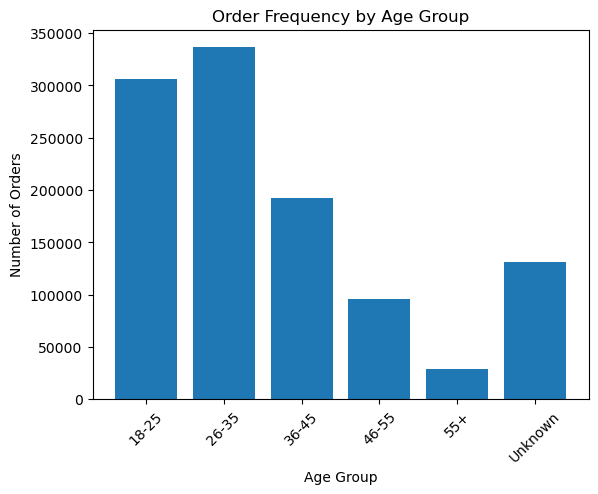

In [55]:
# Bar Plot for Order Frequency by Age Group
plt.bar(age_frequency['customer_age_group'],
        age_frequency['transaction_id'])

plt.title("Order Frequency by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

In [56]:
age_category = df.groupby(['customer_age_group','subcategory'])['final_amount_inr'].sum().reset_index()
age_category.head()

,customer_age_group,subcategory,final_amount_inr
0,18-25,Audio,3.046450e+08
1,18-25,Laptops,2.274177e+09
2,18-25,Smart Watch,8.722049e+08
3,18-25,Smartphones,1.404858e+10
4,18-25,TV & Entertainment,4.436346e+08


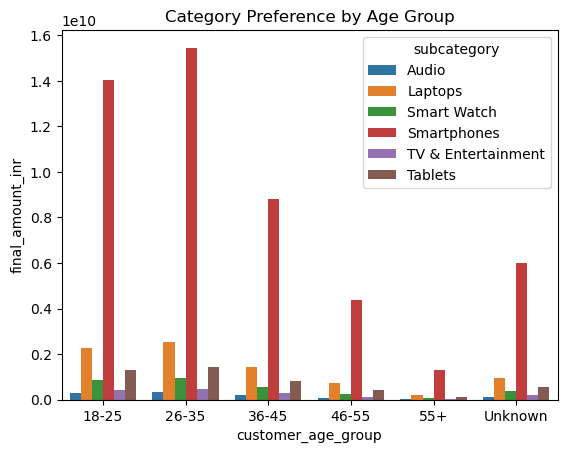

In [59]:
sns.barplot(data=age_category, x='customer_age_group', y='final_amount_inr', hue='subcategory')
plt.title("Category Preference by Age Group")
plt.show()

- The 26–35 age group contributes the highest revenue and shows strong shopping frequency
- Customers between 45 to 55 show lower frequency 

#### Question 10
- Build price vs demand analysis using scatter plots and correlation matrices. Analyze how pricing strategies affect sales volumes across different categories and customer segments.


In [14]:
df["quantity"].unique()

array([1, 2, 3])

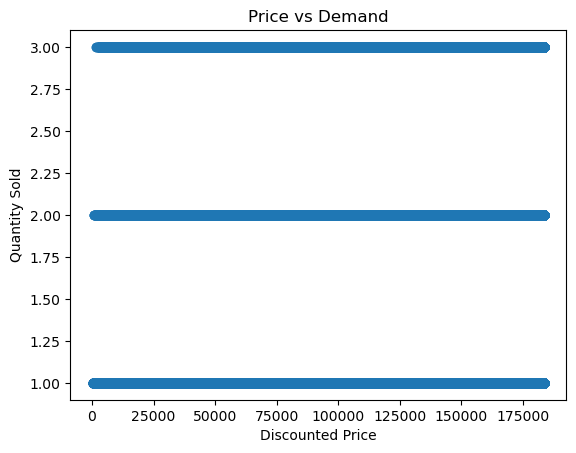

In [60]:
plt.scatter(df['final_amount_inr'], df['quantity'])

plt.title("Price vs Demand")
plt.xlabel("Discounted Price")
plt.ylabel("Quantity Sold")
plt.show()

In [16]:
#correlation = df['final_amount_inr'].corr(df['quantity'])
correlation = df[['final_amount_inr','quantity']].corr()
print("Correlation:", correlation)

Correlation:                   final_amount_inr  quantity
final_amount_inr           1.00000   0.37949
quantity                   0.37949   1.00000


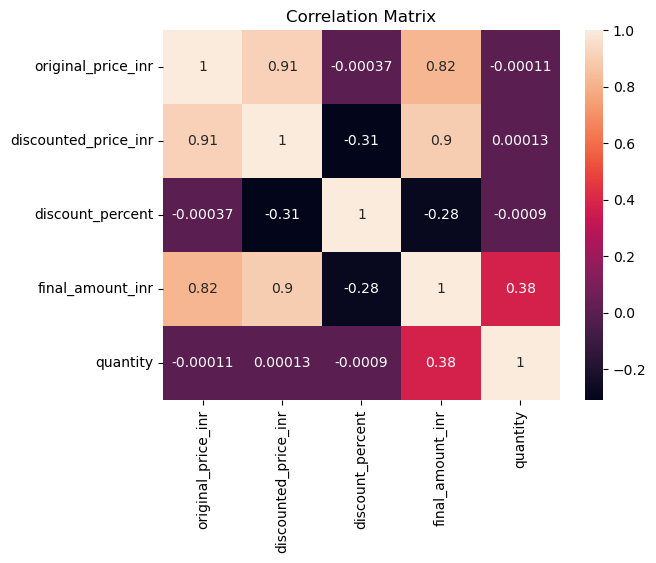

In [17]:
corr_matrix = df[['original_price_inr',
                  'discounted_price_inr',
                  'discount_percent',
                  'final_amount_inr',
                  'quantity']].corr()

sns.heatmap(corr_matrix, annot=True)

plt.title("Correlation Matrix")
plt.show()

- Price and demand show a negative correlation
- indicating that higher prices reduce sales volume
- Discount percentage positively correlates with quantity sold